In [13]:
from sklearn.datasets._samples_generator import make_regression
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import tqdm
import glob
import cv2
import os

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
class LinearRegression() :
      
    def __init__( self, learning_rate=0.01, iterations=500) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
        
        self.grad_hist = [] 
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
        
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
        
        param = (self.W,self.b)
        self.grad_hist.append(param)
        
        for i in range( self.iterations ) :
            
            self.update_weights()
            param = (self.W,self.b)
            self.grad_hist.append(param)
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
    
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X) :
      
        return X.dot(self.W) + self.b
    

In [16]:
def predict(x,param):
    w = param[0][0]
    b = param[1]
    h = x.dot(w)+b
    return h


def process_frames(X,Y,grad_hist,frame_save_path):
    i=0
    for i in tqdm.tqdm(range(len(grad_hist)), desc='Processing Frames'):
        Y_pred = predict(X,grad_hist[i])
        fig = plt.figure(figsize=(10, 6),dpi=100, facecolor=None)
        fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        ax = plt.axes()
        ax.set_facecolor('#0A192F');
        plt.scatter(X,Y,color='orange');
        plt.plot(X,Y_pred,color='cyan', linewidth=2)
        plt.ylim(-10, 70)
        plt.yticks(())
        plt.xticks(())
        fpath = os.path.join(frame_save_path,f"{i}.jpg")
        plt.savefig(fpath)
        i+=1
        #plt.show()
        #plt.pause(0.05)
        plt.clf();  
    return None


def write_video(video_path,frame_save_path,fps):
    
    num_frames = len(glob.glob(frame_save_path+"/*"))

    img=[]
    for i in tqdm.tqdm(range(num_frames), desc='Appending Frames'):
        fpath = os.path.join(frame_save_path,f"{i}.jpg")
        img.append(cv2.imread(fpath))

    height,width,layers=img[1].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    size = (width,height)
    fps = fps
    video = cv2.VideoWriter(video_path, fourcc, fps , size)

    for j in tqdm.tqdm(range(len(img)), desc='Writing Video'):
        video.write(img[j])

    cv2.destroyAllWindows()
    video.release()
    return None


def write_gif(gif_path,frame_save_path,fps):
    d = 1/fps
    num_frames = len(glob.glob(frame_save_path+"/*"))
    with imageio.get_writer(gif_path, mode='I', duration=d) as writer:
        for i in tqdm.tqdm(range(num_frames), desc='Writing GIF'):
            fpath = os.path.join(frame_save_path,f"{i}.jpg")
            image = imageio.imread(fpath)
            writer.append_data(image)
    return None


def play_video(video_path,fps):   
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():

        ret,frame = cap.read()

        if ret == True:

            cv2.imshow('frame',frame)
            wait_ms = int(1000/fps)
            if cv2.waitKey(wait_ms) & 0xFF == ord("q"):    # Don't use "and" instead of "&"
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
    
    return None


def plot_data(X,Y,Y_pred=False):
    fig = plt.figure(figsize=(10, 6),dpi=100, facecolor=None)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    ax = plt.axes()
    ax.set_facecolor('#0A192F')
    plt.scatter(X,Y,color='orange')
    if not type(Y_pred)==bool:
        plt.plot(X,Y_pred,color='cyan', linewidth=2)
    plt.ylim(-10, 70)
    plt.yticks(())
    plt.xticks(())
    return None

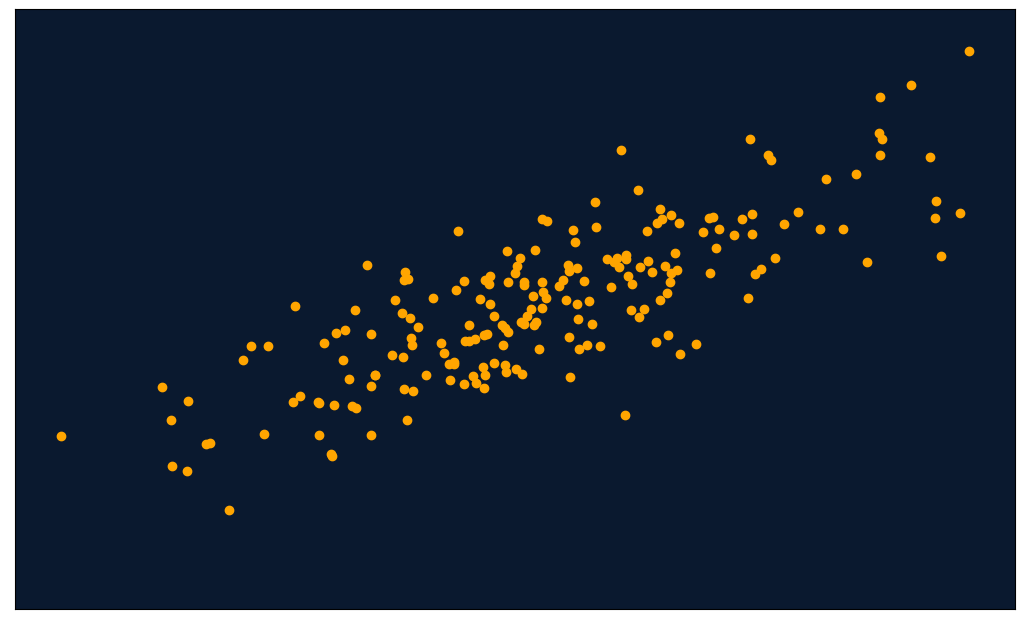

In [19]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
plot_data(X,Y)

In [20]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)

model = LinearRegression( iterations = 200, learning_rate = 0.01 )

model.fit(X,Y)
  
Y_pred = model.predict(X)

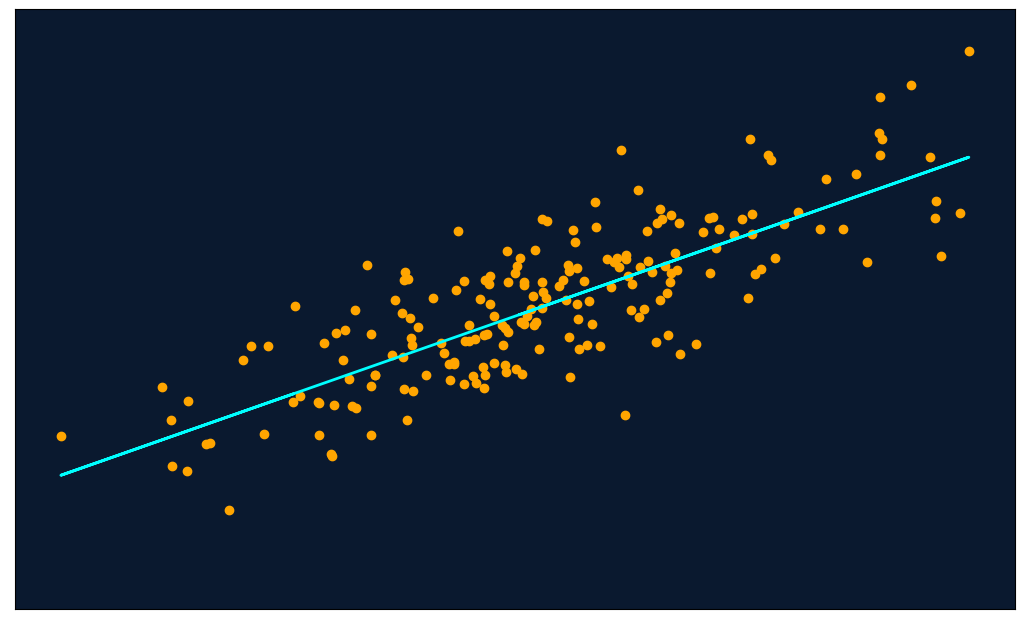

In [21]:
plot_data(X,Y,Y_pred)

In [8]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
model = LinearRegression( iterations = 200, learning_rate = 0.01 )
model.fit(X,Y)   
grad_hist = model.grad_hist
Y_pred = model.predict(X)

frame_save_path = 'linear frames'
video_path = 'linear.mp4'
gif_path = 'linear.gif'
fps = 20

if not os.path.exists(frame_save_path):
    os.mkdir(frame_save_path)


def main(play=True):
    
    start = time.time()
    process_frames(X,Y,grad_hist,frame_save_path)
    write_video(video_path,frame_save_path,fps)
    write_gif(gif_path,frame_save_path,fps)
    end = time.time()
    
    print(f"Total elapsed time = {end-start} seconds")
    
    if play:
        play_video(video_path,fps)
        
    return None


if __name__== '__main__':
    main()

Writing GIF: 100%|███████████████████████████████████████████████████████████████████| 201/201 [00:35<00:00,  5.70it/s]


Total elapsed time = 77.25185060501099 seconds


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>